1. Welcome back to class
2. This week I will grade and handback the assignments over D2L
3. We will be covering Chapter 6 this week 
4. Make sure to Read Chapter 6, watch the videos, complete the following quizzes by Wednesday
5. This week we also have 2 assignments Due Homework 2 and Lab 2. 
6. We will focus on Lab 2 in class today and Homework 2 on Wednesday
7. Lets get started!
8. Remember if you would like to review these notes to download the html file and place it and place to remember 



In [2]:
# Todays class we will focus on working with tables
# By running this line of code, we are importing everything we need to work with tables and arrays
from datascience import *
import numpy as np
################################################

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')




## Lecture 6

## Table Review: Welcome Survey

In [15]:
#Lets run this cell
#In this cell we have a table from a welcome survery
# Orginally this was to be our welcome survey but ya know covid
# But they asked the same questions that we did and some more
# Like extraversion and Number of textees
welcome = Table.read_table('welcome_survey_v1.csv')
welcome.show(999)

#We have been working with tables for about a week. 
#Remember there are a few ways to think about tables
#a sequence of named columns that each describe a single aspect of all entries or
#a sequence of rows that each contain all information about a single entry.
#Another way to think about a table is like its almost an array of arraies!
#3.Here we see some information about the structure of a table
#The column name is called a label which is always a string
#each columns and rows are always the same length

Extraversion,Number of textees,Hours of sleep,Handedness,Pant leg,Sleep position
4,6,4,Both,I don't know,On your back
8,6,7,Both,I don't know,On your back
9,6,7,Both,I don't know,On your back
2,3,6.75,Left-handed,I don't know,On your back
7,10,7,Left-handed,I don't know,On your back
8,50,8,Left-handed,I don't know,On your back
4,5,10,Left-handed,I don't know,On your back
7,2,5,Right-handed,I don't know,On your back
3,7,5,Right-handed,I don't know,On your back
6,8,5.5,Right-handed,I don't know,On your back


In [18]:
#Last week we introduced methods to work with tables
#2.  Lets review some of these methods by looking at an example


# On average, how long do side-sleepers sleep?

# Lets first see look at the column for  Sleeop poistion

welcome.show(999) # There is 4 possbilites on back, sides l or R , and stomach

# Now we need to find those who sleeop on there side!
# We use the where method this the first argument is the column name the second is the predicate
side_sleepers = welcome.where('Sleep position', are.containing('side')) # Here we see that we are lookin sleep poistion and the
np.average(side_sleepers.column('Hours of sleep')) #    whose sleeps on the side. 




#One key to remember is that the columns of a table is an array. We need to occusanly work with columns 
#This methods allows us to get arrays from a table and then use array operations to work with 

# Now lets compute how many texteets are

# On average, how many textees do extraverts 9 or higher text? # Lets break this down 


extraverts =welcome.where('Extraversion', are.above_or_equal_to(9))
np.average(extraverts.column('Number of textees'))


['On your back' 'On your back' 'On your back' ... 'On your stomach'
 'On your stomach' 'On your stomach']


10.021978021978022

In [4]:
# How many students get at least 8 hours of sleep each night (on average)?
#There are a few ways to get this solution
# we will just go over the first two!
# We could use the where method
#
#1. Find table where sleep is above or eual to 8
#2. Find num of rows

# First way:
welcome.where('Hours of sleep', are.above_or_equal_to(8)).num_rows

417

In [25]:
# Second way
# Alternatively we can use column.
# recall theat cikumn returns an array lets test this!
#welcome.column('Hours of sleep')
# this array contains the hours of sleep 
# Now remeber arrays and operations play nice so lets find all numbers larger then 7
#welcome.column('Hours of sleep') >= 8
# This array returns all positions where the array has value larger than 7
# False = 0 and True = 1 

#Now we can just sum up all the values

sum(welcome.column('Hours of sleep') >= 8)

# Find the number of students that got less then 8 hours of sleeP!


417

In [26]:
# Third way 
np.sum(welcome.column('Hours of sleep') >= 8)

417

In [32]:
#We will end the review by lookin at labels
#welcome.labels
#12.Tables().labels – returns an array of the column names 

# we can relabel columns with the relabeled method

#welcome.relabeled('Hours of sleep', 'sleep')

#ALTERNATIVELY, WE can use position to detemine the column name we are changeing

welcome.relabeled(2, 'sleep')

# Create a table with only the two sleep-related columns, 
# with names 'Hours' and 'Position'


#two_col = welcome.select('Hours of sleep', 'Sleep position') # Selecting two columns and saving it to an ew table called two_col
#sleep = two_col.relabeled(0, 'Hours').relabeled(1, 'Position') # we are relabeling bothe columns here
#sleep.show(3)

Extraversion,Number of textees,sleep,Handedness,Pant leg,Sleep position
4,6,4,Both,I don't know,On your back
8,6,7,Both,I don't know,On your back
9,6,7,Both,I don't know,On your back
2,3,6.75,Left-handed,I don't know,On your back
7,10,7,Left-handed,I don't know,On your back
8,50,8,Left-handed,I don't know,On your back
4,5,10,Left-handed,I don't know,On your back
7,2,5,Right-handed,I don't know,On your back
3,7,5,Right-handed,I don't know,On your back
6,8,5.5,Right-handed,I don't know,On your back


In [8]:
# Second way
two_col = welcome.drop('Handedness', 'Extraversion', 'Pant leg')
sleep = two_col.relabeled(0, 'Hours').relabeled(1, 'Position')
sleep.show(3)

Hours,Position,Sleep position
6,4,On your back
6,7,On your back
6,7,On your back


## Discussion Question: NBA Salaries

In [37]:
# Now we are going to try an example. I will break the class into groups
# First suppose we have the table of the NBA salaries

nba = Table.read_table('nba_salaries.csv')
nba = nba.relabeled(3, 'SALARY').drop('TEAM')
nba.show(55) # This table contains name position and salary in millions!

PLAYER,POSITION,SALARY
Paul Millsap,PF,18.6717
Al Horford,C,12
Tiago Splitter,C,9.75625
Jeff Teague,PG,8
Kyle Korver,SG,5.74648
Thabo Sefolosha,SF,4
Mike Scott,PF,3.33333
Kent Bazemore,SF,2
Dennis Schroder,PG,1.7634
Tim Hardaway Jr.,SG,1.30452


In [40]:
# Question (a)
#Create an array containing the names of all point  guards (SG) who make less than $10M/year but not equal to?

guards = nba.where('POSITION', 'SG')
guards.where('SALARY', are.below(10)).column('PLAYER')

array(['Kyle Korver', 'Tim Hardaway Jr.', 'Jason Richardson',
       'Lamar Patterson', 'Terran Petteway', 'Evan Turner', 'James Young',
       'Zoran Dragic', 'R.J. Hunter', 'Bojan Bogdanovic',
       'Sergey Karasev', 'Wayne Ellington', 'Rondae Hollis-Jefferson',
       'Markel Brown', 'Courtney Lee', 'Jeremy Lamb', 'Damien Wilkins',
       'Troy Daniels', 'Aaron Harrison', 'Mike Dunleavy', 'Kirk Hinrich',
       "E'Twaun Moore", 'Iman Shumpert', 'Justin Anderson',
       'John Jenkins', 'Gary Harris', 'Sean Kilpatrick', 'Jodie Meeks',
       'Kentavious Caldwell-Pope', 'Leandro Barbosa', 'Corey Brewer',
       'K.J. McDaniels', 'Glenn Robinson III', 'J.J. Redick',
       'Jamal Crawford', 'C.J. Wilcox', 'Jordan Hamilton',
       'Lester Hudson', 'Louis Williams', 'Tony Allen', 'Vince Carter',
       'Jordan Adams', 'Elliot Williams', 'Tyler Johnson',
       'Josh Richardson', 'O.J. Mayo', 'Rashad Vaughn', 'Kevin Martin',
       'Andrew Wiggins', 'Bryce Dejean-Jones', 'Arron Afflalo'

In [1]:
# Question (b) After evaluating these two expressions in order, why's is the result of the second one 2?


nba.drop('POSITION')
nba.num_columns

NameError: name 'nba' is not defined

## Census ##

In [ ]:
#Announcements
#
#1. Grades for lab 1 returned
#2. Notes - Need to complete each questions- show
#3. Grade score = .7*solutions + .3*format
#
#4.Reminder - Lab 2 and HW2 due this week
#5.Reminder - Complete quizzes

In [3]:
# Here we are loading up our data set. This can be found on the USA gov website

full = Table.read_table('nc-est2014-agesex-res.csv')
full.show()

# Cencus2010 was the recorded estimate
# Here we have a population estimate

# if we look at the whole table again 0 is entire population 
# 1 is males and 2 is females



SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014
0,0,3944153,3944160,3951330,3963071,3926665,3945610,3948350
0,1,3978070,3978090,3957888,3966510,3978006,3943077,3962123
0,2,4096929,4096939,4090862,3971573,3979952,3992690,3957772
0,3,4119040,4119051,4111920,4102501,3983049,3992425,4005190
0,4,4063170,4063186,4077552,4122303,4112638,3994047,4003448
0,5,4056858,4056872,4064653,4087713,4132210,4123408,4004858
0,6,4066381,4066412,4073013,4074979,4097780,4143094,4134352
0,7,4030579,4030594,4043047,4083240,4084964,4108615,4154000
0,8,4046486,4046497,4025604,4053206,4093213,4095827,4119524
0,9,4148353,4148369,4125415,4035769,4063193,4104133,4106832


In [4]:
partial = full.select('SEX', 'AGE', 'CENSUS2010POP', 'POPESTIMATE2014')
partial.show(4)

# here we are cutting our table down into 4 columns so that 
#we can look more closely

## Rember select creates a new table that contains only listed columns

SEX,AGE,CENSUS2010POP,POPESTIMATE2014
0,0,3944153,3948350
0,1,3978070,3962123
0,2,4096929,3957772
0,3,4119040,4005190


In [5]:
# Lets also relabel the columns

simple = partial.relabeled(2, '2010').relabeled(3, '2014')
simple.show(4)

SEX,AGE,2010,2014
0,0,3944153,3948350
0,1,3978070,3962123
0,2,4096929,3957772
0,3,4119040,4005190


In [6]:
simple.sort('AGE') # we can sort by the age row
                   # Shows number of people who where infinats in 2010,2014
                   # About 3.9 mill in 2014
                   # where 2 million are male and 1.9 millions are female

SEX,AGE,2010,2014
0,0,3944153,3948350
1,0,2014276,2017857
2,0,1929877,1930493
0,1,3978070,3962123
1,1,2030853,2023253
2,1,1947217,1938870
0,2,4096929,3957772
1,2,2092198,2022502
2,2,2004731,1935270
0,3,4119040,4005190


In [7]:
simple.sort('AGE', descending=True)


# 999 is spceial code for regardless of age!
# we can also reverse the order of the age
# here we see about 318 billion people in 2014 of any age
# wih 161 billions femals and 156 males 
# we see that women tend to live longer

# weird look at ppolation betwee n99 and 100
# 100 is more!

SEX,AGE,2010,2014
0,999,308745538,318857056
1,999,151781326,156936487
2,999,156964212,161920569
0,100,53364,72197
1,100,9162,13729
2,100,44202,58468
0,99,32266,41828
1,99,6073,9037
2,99,26193,32791
0,98,45900,60185


## Visualization ##

In [11]:
no_999 = simple.where('AGE', are.below(999))
everyone = no_999.where('SEX', 0).drop('SEX')

#its difficult to read the data from th chart is just a 
#wall of text. 
#let clean this understanding up by graphing the data
#Here we are gettting ride of the general population

#Then we are finding the populations per age

#no_999
#no_999.where('SEX', 0)

SEX,AGE,2010,2014
0,0,3944153,3948350
0,1,3978070,3962123
0,2,4096929,3957772
0,3,4119040,4005190
0,4,4063170,4003448
0,5,4056858,4004858
0,6,4066381,4134352
0,7,4030579,4154000
0,8,4046486,4119524
0,9,4148353,4106832


In [25]:
everyone # we get the population

AGE,2010,2014
0,3944153,3948350
1,3978070,3962123
2,4096929,3957772
3,4119040,4005190
4,4063170,4003448
5,4056858,4004858
6,4066381,4134352
7,4030579,4154000
8,4046486,4119524
9,4148353,4106832


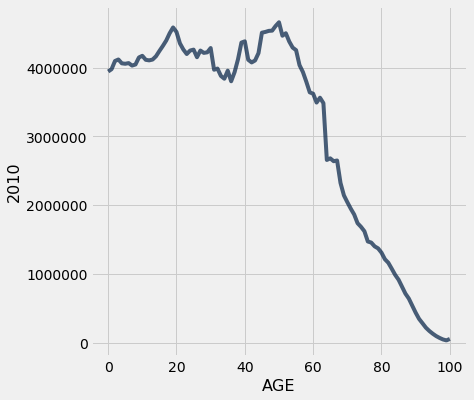

In [13]:
everyone.plot('AGE', '2010')

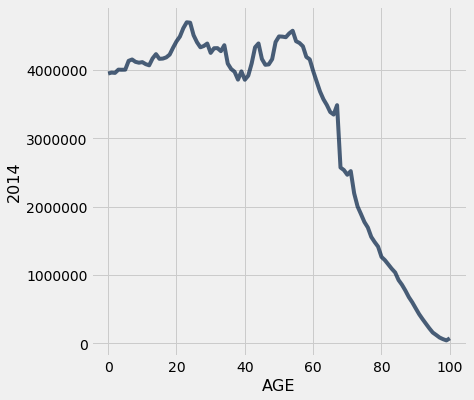

In [14]:
everyone.plot('AGE', '2014')